# This notebook wil be used to capstone project data science in coursera

## Table of contents
* [Business Problem](#business)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Business Problem <a name="business"></a>

A system to reduce accidents will be favoured by car users, insurance companies, road maintenance, cities/municipalities/governments and, if relevant, habitants in the area. 
It would reduce the costs caused by accidents, as well as improve the traffic by reducing congestion caused by accidents. Predict the possibility of getting to a car accident and its severity given the current driver and driving conditions in order to reduce damages in a real-life scenario.

## Data <a name="data"></a>

Data is already provided through a CSV file called Data-Collisions.csv which contains 194673 rows. 

The next step is to remove irrelevant columns: COLDETKEY, REPORTNO, STATUS, INTKEY, LOCATION, EXCEPTRSNCODE, EXCEPTRSNDESC, JUNCTIONTYPE, SDOT_COLCODE, SDOT_COLDESC, INATTENTIONIND, UNDERINFL, PEDROWNOTGRNT, SDOTCOLNUM, SPEEDING, ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY, HITPARKEDCAR, COLLISIONTYPE, ADDRTYPE, SEVERITYDESC.

Then we have to identify the relevant columns by looking for trends and patterns in this case: WEATHER, ROADCOND, LIGHTCOND, PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT, INCDATE, INCDTTM.

Then we eliminate duplicate columns: SEVERITYCODE.

Dealing with missing data by removing the row.

Normalising, balancing or transforming data in order to be able to work with different models in the next step. This could include for example changing strings that describe weather to numeric input.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

In [3]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
# summarize the data
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
# Select columns
sdf=df[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','ROADCOND','LIGHTCOND','WEATHER','INCDTTM']]
sdf.head(9)

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,WEATHER,INCDTTM
0,2,2,0,0,2,Wet,Daylight,Overcast,3/27/2013 2:54:00 PM
1,1,2,0,0,2,Wet,Dark - Street Lights On,Raining,12/20/2006 6:55:00 PM
2,1,4,0,0,3,Dry,Daylight,Overcast,11/18/2004 10:20:00 AM
3,1,3,0,0,3,Dry,Daylight,Clear,3/29/2013 9:26:00 AM
4,2,2,0,0,2,Wet,Daylight,Raining,1/28/2004 8:04:00 AM
5,1,2,0,0,2,Dry,Daylight,Clear,4/20/2019 5:42:00 PM
6,1,2,0,0,2,Wet,Daylight,Raining,12/9/2008
7,2,3,0,1,1,Dry,Daylight,Clear,4/15/2020 5:47:00 PM
8,1,2,0,0,2,Dry,Daylight,Clear,6/15/2006 1:00:00 PM


In [6]:
sdf.dtypes

SEVERITYCODE     int64
PERSONCOUNT      int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
VEHCOUNT         int64
ROADCOND        object
LIGHTCOND       object
WEATHER         object
INCDTTM         object
dtype: object

In [7]:
#drop rows with empty fields
sdf=sdf.dropna()
sdf.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,WEATHER,INCDTTM
0,2,2,0,0,2,Wet,Daylight,Overcast,3/27/2013 2:54:00 PM
1,1,2,0,0,2,Wet,Dark - Street Lights On,Raining,12/20/2006 6:55:00 PM
2,1,4,0,0,3,Dry,Daylight,Overcast,11/18/2004 10:20:00 AM
3,1,3,0,0,3,Dry,Daylight,Clear,3/29/2013 9:26:00 AM
4,2,2,0,0,2,Wet,Daylight,Raining,1/28/2004 8:04:00 AM


In [8]:
#Pass to datetime format
sdf['INCDTTM'] = pd.to_datetime(sdf['INCDTTM'])
sdf.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,WEATHER,INCDTTM
0,2,2,0,0,2,Wet,Daylight,Overcast,2013-03-27 14:54:00
1,1,2,0,0,2,Wet,Dark - Street Lights On,Raining,2006-12-20 18:55:00
2,1,4,0,0,3,Dry,Daylight,Overcast,2004-11-18 10:20:00
3,1,3,0,0,3,Dry,Daylight,Clear,2013-03-29 09:26:00
4,2,2,0,0,2,Wet,Daylight,Raining,2004-01-28 08:04:00


In [9]:
#Add day of week and weekend
sdf['dayofweek'] = sdf['INCDTTM'].dt.dayofweek
sdf['weekend']= sdf['dayofweek'].apply(lambda x: 1 if (x>4)  else 0)
sdf.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,WEATHER,INCDTTM,dayofweek,weekend
0,2,2,0,0,2,Wet,Daylight,Overcast,2013-03-27 14:54:00,2,0
1,1,2,0,0,2,Wet,Dark - Street Lights On,Raining,2006-12-20 18:55:00,2,0
2,1,4,0,0,3,Dry,Daylight,Overcast,2004-11-18 10:20:00,3,0
3,1,3,0,0,3,Dry,Daylight,Clear,2013-03-29 09:26:00,4,0
4,2,2,0,0,2,Wet,Daylight,Raining,2004-01-28 08:04:00,2,0


In [10]:
#convert categorical features to numerical values
sdf.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts(normalize=True)
sdf['ROADCOND'].replace(to_replace=['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
sdf.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,WEATHER,INCDTTM,dayofweek,weekend
0,2,2,0,0,2,1,Daylight,Overcast,2013-03-27 14:54:00,2,0
1,1,2,0,0,2,1,Dark - Street Lights On,Raining,2006-12-20 18:55:00,2,0
2,1,4,0,0,3,0,Daylight,Overcast,2004-11-18 10:20:00,3,0
3,1,3,0,0,3,0,Daylight,Clear,2013-03-29 09:26:00,4,0
4,2,2,0,0,2,1,Daylight,Raining,2004-01-28 08:04:00,2,0


In [11]:
sdf.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts(normalize=True)
sdf['LIGHTCOND'].replace(to_replace=['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

In [12]:
sdf.groupby(['SEVERITYCODE'])['WEATHER'].value_counts(normalize=True)
sdf['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)

In [13]:
sdf.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,WEATHER,INCDTTM,dayofweek,weekend
0,2,2,0,0,2,1,0,2,2013-03-27 14:54:00,2,0
1,1,2,0,0,2,1,1,1,2006-12-20 18:55:00,2,0
2,1,4,0,0,3,0,0,2,2004-11-18 10:20:00,3,0
3,1,3,0,0,3,0,0,0,2013-03-29 09:26:00,4,0
4,2,2,0,0,2,1,0,1,2004-01-28 08:04:00,2,0


In [14]:
sdf.shape

(189337, 11)

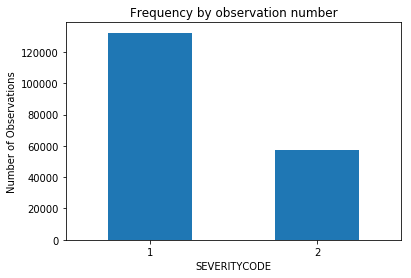

In [22]:
#show disbalanced severity codes
LABELS= ['1','2']
count_codes = pd.value_counts(sdf['SEVERITYCODE'], sort = True)
count_codes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("SEVERITYCODE")
plt.ylabel("Number of Observations");